In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1HBEqAgR5XH3SQAorAWnlAhHM8Jbd2Trj/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('efsyn_clean.csv')  
  
df = pd.read_csv('efsyn_clean.csv')
print(df)

     Unnamed: 0  ...      time
0             0  ...  15:10:00
1             1  ...  13:46:00
2             2  ...  14:00:00
3             3  ...  12:59:00
4             4  ...  11:49:00
..          ...  ...       ...
588         588  ...  12:11:00
589         589  ...  20:59:00
590         590  ...  13:52:00
591         591  ...  18:00:00
592         592  ...  06:00:00

[593 rows x 10 columns]


Καθάρισμα:

In [ ]:
df["body"].replace({"article_end": " ", "\ngoogletag.cmd.push(function() {\ngoogletag.display": " "}, inplace=True)


In [ ]:
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [ ]:
df.dropna()

title  ...   C
date                                                           ...    
2020-04-06  Τσακαλώτος: Η Ν.Δ μας έβαλε σε τροχιά ύφεσης π...  ...   6
2020-04-13  Απογείωση χρέους προς το 200% του ΑΕΠ | Η Εφημ...  ...  13
2020-03-26  Επίδομα... πτωχοκομείου δίνει η Ελλάδα | Η Εφη...  ...  26
2021-05-03  Έσβησαν τα φώτα στη «Βαρβάκειο» σε ένδειξη δια...  ...   3
2020-07-11  Εstiasigreece: η εστίαση υποφέρει | Η Εφημερίδ...  ...  11
...                                                       ...  ...  ..
2021-04-25  Ανεβάζει ρυθμούς η αγορά - Ωράριο καταστημάτων...  ...  25
2021-03-04  Ξεχειλίζει η δυσαρέσκεια στο παρά ένα του ανοί...  ...   4
2020-11-12  Στο βά(ρα)θρο οι χαμηλόμισθοι | Η Εφημερίδα τω...  ...  12
2020-08-27  Μικρο-στήριξη και για μελισσοκόμους | Η Εφημερ...  ...  27
2020-03-13  Στη δεκαετία του ’80 οδηγούν τα αλλεπάλληλα κρ...  ...  13

[590 rows x 27 columns]

In [ ]:
df['body'] = df['body'].str.replace(r'\xa0'," ")

In [ ]:
df['body'] = df['body'].str.replace(r'\ngoogletag.cmd.push(function() {\ngoogletag.display("article_end");\n});\n'," ")

In [ ]:
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

-------------------

Polarity/subjectivity:

In [ ]:
import sqlite3
from textblob import TextBlob
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

body_blob = [TextBlob(body) for body in df['body']]
df['Polarity'] = [b.sentiment.polarity for b in body_blob]
df['Subjectivity'] = [b.sentiment.subjectivity for b in body_blob]

analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df['body']]
df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df['body']]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df['body']]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df['body']]
df.head(3)

title        date  ...    neu    pos
0  Τσακαλώτος: Η Ν.Δ μας έβαλε σε τροχιά ύφεσης π...  06/04/2020  ...  1.000  0.000
1  Απογείωση χρέους προς το 200% του ΑΕΠ | Η Εφημ...  13/04/2020  ...  0.996  0.004
2  Επίδομα... πτωχοκομείου δίνει η Ελλάδα | Η Εφη...  26/03/2020  ...  0.996  0.004

[3 rows x 15 columns]

In [ ]:
#The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). 
#The more Compound score closer to +1, the higher the positivity of the text.

----

Sentiment analysis

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
#!python -m spacy download el_core_news_sm


In [ ]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [ ]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%d/%m/%Y')


In [ ]:
a = df[df['year']==2020]

In [ ]:
b = df[df['year']==2021]

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
CountVectorizer(stop_words= ["article_end","googletag.cmd.push(function() {\ngoogletag.display"] + list(nlp.Defaults.stop_words), binary=True)

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(df['body'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [ ]:
#λίστα με angry words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

#λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

#λίστα με sad words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

#λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

#λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

#λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

#λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

#λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

#λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

#λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)




In [ ]:
df.set_index('date' , inplace=True)

In [ ]:
df.index = pd.to_datetime(df.index)


In [ ]:
df['A'] = df.index.year
df['B'] = df.index.month
df['C'] = df.index.day

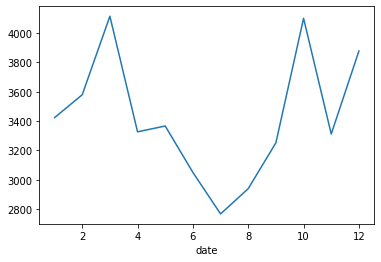

In [ ]:
df['body'].str.len().groupby(by=df.index.month).mean().plot() 

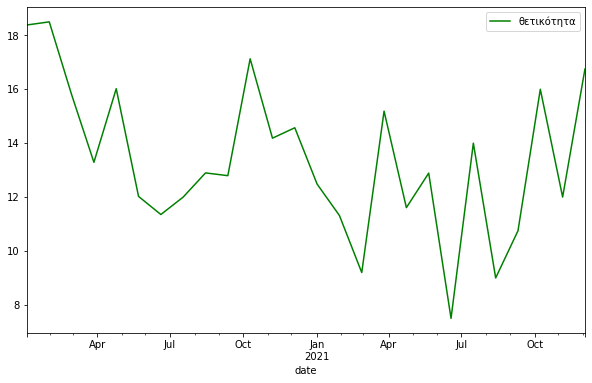

In [ ]:
df['positivity'].resample('20B').mean().plot(color = 'green',label = 'θετικότητα',figsize=(10, 6)).legend()

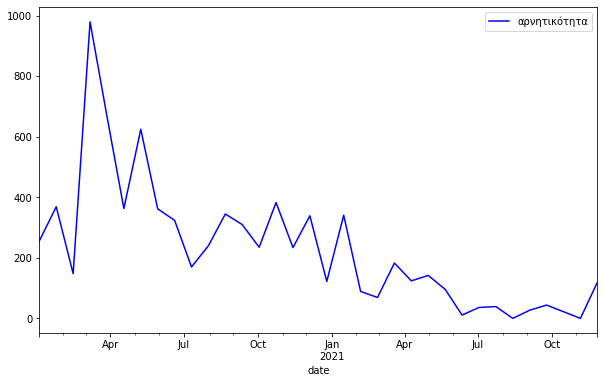

In [ ]:
df['negative'].resample('15B').sum().plot(color = 'b',label = 'αρνητικότητα',figsize=(10, 6)).legend() 

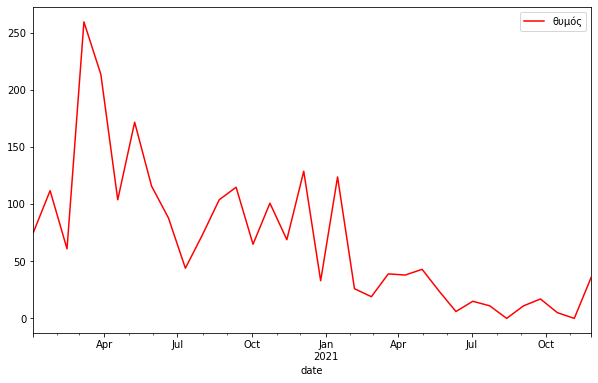

In [ ]:
df['anger'].resample('15B').sum().plot(color = 'red',label = 'θυμός',figsize=(10, 6)).legend() 

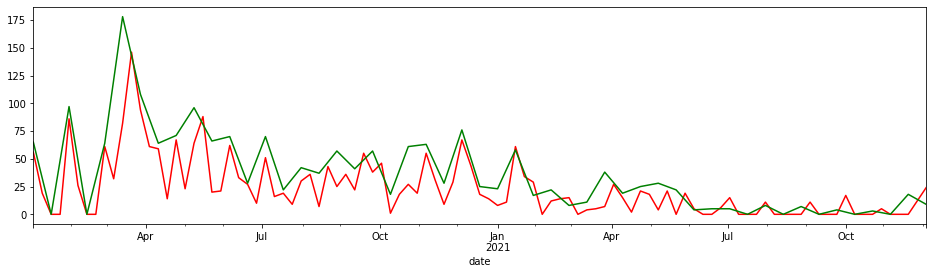

In [ ]:
ax = df['anger'].resample('5B').sum().plot(figsize=(16,4), color = 'red')
df['joy'].resample('10B').sum().plot(figsize=(16,4), ax = ax, color = 'green')

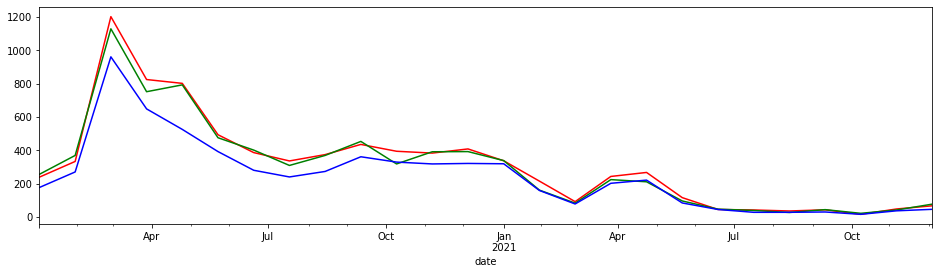

In [ ]:
ax = df['positivity'].resample('20B').sum().plot(figsize=(16,4), color = 'red')
df['negative'].resample('20B').sum().plot(figsize=(16,4), ax = ax, color = 'green')
df['trust'].resample('20B').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

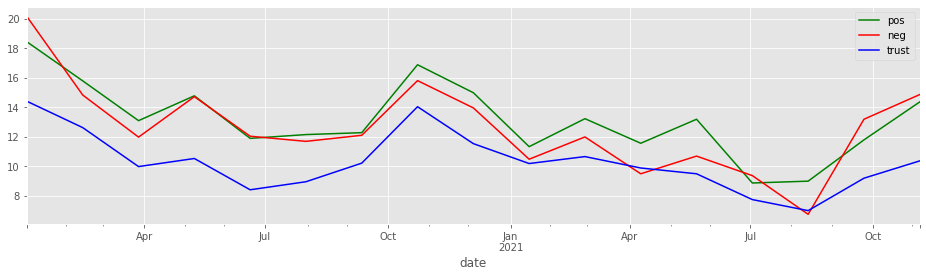

In [ ]:
ax = df['positivity'].resample('30B').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
df['negative'].resample('30B').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
df['trust'].resample('30B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

---------

In [ ]:
#άλλες αναλύσεις

In [ ]:
df.head()

title  ...   C
date                                                           ...    
2020-04-06  Τσακαλώτος: Η Ν.Δ μας έβαλε σε τροχιά ύφεσης π...  ...   6
2020-04-13  Απογείωση χρέους προς το 200% του ΑΕΠ | Η Εφημ...  ...  13
2020-03-26  Επίδομα... πτωχοκομείου δίνει η Ελλάδα | Η Εφη...  ...  26
2021-05-03  Έσβησαν τα φώτα στη «Βαρβάκειο» σε ένδειξη δια...  ...   3
2020-07-11  Εstiasigreece: η εστίαση υποφέρει | Η Εφημερίδ...  ...  11

[5 rows x 27 columns]

In [ ]:
#δημοσιεύσεις (ημερομηνία ) με περισσότερο θυμό

In [ ]:
df.sort_values(by='anger',ascending=False).head()

title  ...   C
date                                                           ...    
2020-03-23  16 απαντήσεις από το Υπουργείο Τουρισμού στη σ...  ...  23
2020-12-04  Αλλο η ενημέρωση κι άλλο η σπατάλη κι η προπαγ...  ...   4
2020-02-05  «Κουρεμένο» και για... λίγους το δεύτερο κύμα ...  ...   5
2020-11-08  «Ισχυρό οικονομικό πλήγμα» η ακύρωση της ΔΕΘ λ...  ...   8
2020-05-18  Τραπεζάκια έξω, παντού, μέχρι την... Πρωτοχρον...  ...  18

[5 rows x 27 columns]

In [ ]:
df.sort_values(by='fear',ascending=False).head()

title  ...   C
date                                                           ...    
2020-10-31  Οι ΚΑΔ που πλήττονται από την υγειονομική κρίσ...  ...  31
2020-03-23  16 απαντήσεις από το Υπουργείο Τουρισμού στη σ...  ...  23
2020-12-04  Αλλο η ενημέρωση κι άλλο η σπατάλη κι η προπαγ...  ...   4
2020-05-20  Επανεκκίνηση με «καύσιμο» εργαζόμενους και μικ...  ...  20
2020-12-04  Πώς οι τράπεζες έγιναν digital μέχρι να πεις.....  ...   4

[5 rows x 27 columns]

In [ ]:
df.sort_values(by='Polarity', ascending=False).head()

title  ...   C
date                                                           ...    
2020-05-21  Στα πακέτα θα στηριχτεί ο τουρισμός φέτος | Η ...  ...  21
2020-06-15  Στην εκκίνηση και η «ΣΥΝ-ΕΡΓΑΣΙΑ» | Η Εφημερίδ...  ...  15
2020-04-28  Εμφύλιος μεταξύ μικρών και μεγάλων ξενοδοχείων...  ...  28
2020-10-22  Πάνω από τα 38 δισ. το «μαξιλάρι» | Η Εφημερίδ...  ...  22
2020-07-30  Επιδότηση 100% στις εισφορές | Η Εφημερίδα των...  ...  30

[5 rows x 27 columns]

In [ ]:
df['Polarity'].mean()

0.025390389075043374

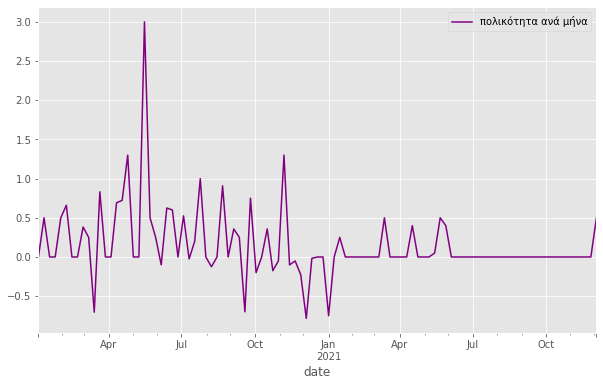

In [ ]:
df['Polarity'].resample('5B').sum().plot(color = 'purple',label = 'πολικότητα ανά μήνα',figsize=(10, 6)).legend() 

In [ ]:
#στο πάνω βλέπουμε και ανά τρίμηνο 

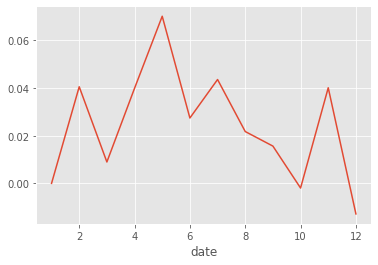

In [ ]:
df['Polarity'].groupby(by=df.index.month).mean().plot() 

In [ ]:
#στο πάνω βλέπουμε την πολικότητα ανά μήνα και για τα 2 έτη! άρα περίπου όταν επικρατούσε λοκνταουν και 2020 και 2021

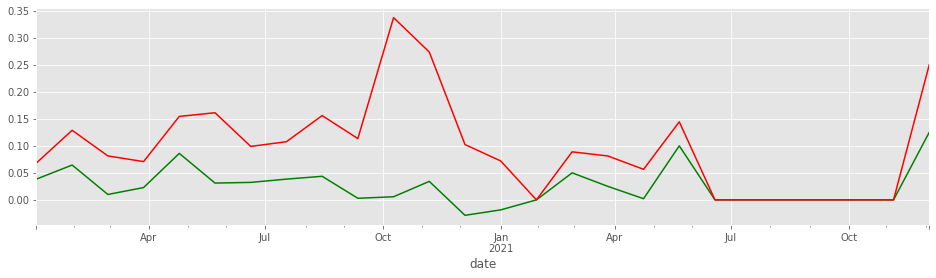

In [ ]:
ax = df['Polarity'].resample('20B').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='πολικότητα')
df['Subjectivity'].resample('20B').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'υποκειμενικότητα', color = 'r')

In [ ]:
year21 = df[df.index.year == 2021]

In [ ]:
may21 = year21[year21.index.month == 5]

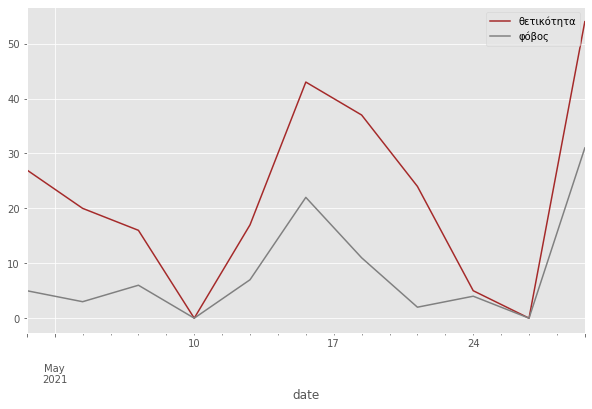

In [ ]:
ax = may21['positivity'].resample('2C').sum().plot(color = 'brown',label = 'θετικότητα',figsize=(10, 6))
may21['fear'].resample('2C').sum().plot(color = 'grey', ax=ax, label = 'φόβος',figsize=(10, 6)).legend() 

In [ ]:
#πάνω βλέπουμε τη θετικότητα τον Μάιο 2021 --> 3/5 άνοιγμα εστίασης, 14/5 άνοιγμα τουρισμού , 